# Linear Discriminant Analysis (LDA)

In [6]:
# Bibliotecas a utilizar 
import numpy                   as np      # Uso de álgebra lineal, funciones vectoriales
import pandas                  as pd      # Trabajar con DataFrames
import matplotlib.pyplot       as plt     # Para realizar gráficas
import seaborn                 as sns     # Otras funciones para graficar

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis    as LDA        # Modelo LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA        # Modelo QDA
from sklearn.metrics               import accuracy_score     # Función para calcular la precisión de clasificación
from sklearn.metrics               import confusion_matrix   # Función para calcular una matriz de confusión

# https://sebastianraschka.com/Articles/2014_python_lda.html
# https://www.wikiwand.com/en/Linear_discriminant_analysis
# https://www.youtube.com/playlist?list=PLblh5JKOoLUIcdlgu78MnlATeyx4cEVeR
# https://statquest.org/


sns.set()
import warnings
warnings.filterwarnings('ignore')

## Datos :: Simulados

In [7]:
# Leemos datos de ejemplo
# Estos fueron creados en el Archivo de 'Ejemplo de PCA'
datos_1 = pd.read_csv("datos_1.csv")   # Datos con dos clases
datos_2 = pd.read_csv("datos_2.csv")   # Datos con dos clases

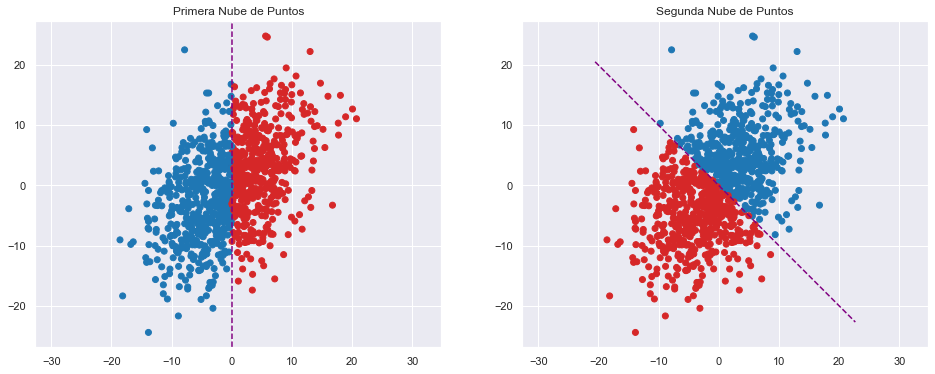

In [8]:
def abline(b0, b1):
    """Grafica una linea recta con ordenada al origen b0 y pendiente b1"""
    x_vals = np.array( plt.gca().get_xlim() )
    y_vals = b0 + b1 * x_vals
    plt.plot(x_vals, y_vals, linestyle='--', color="purple")

# Graficamos nuestros puntos
fig, axs = plt.subplots( nrows = 1, ncols = 2, figsize=(16,6) )
axs[0].set_title("Primera Nube de Puntos")
axs[0].scatter( x=datos_1["X"], y=datos_1["Y"], c=datos_1["Z"], label="Puntos")
axs[0].axvline( 0, linestyle = '--', color="purple")
axs[0].axis('equal')

axs[1].set_title("Segunda Nube de Puntos")
axs[1].scatter( x=datos_2["X"], y=datos_2["Y"], c=datos_2["Z"], label="Puntos")
abline(b0 = 0, b1 = -1)
axs[1].axis('equal')
plt.show()

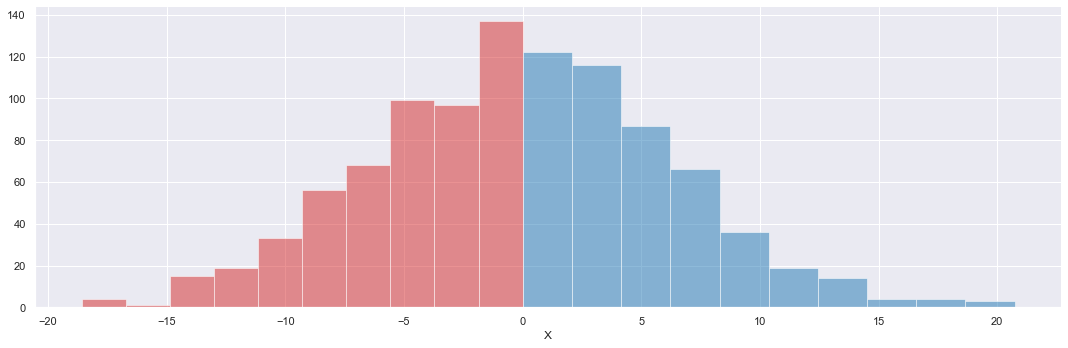

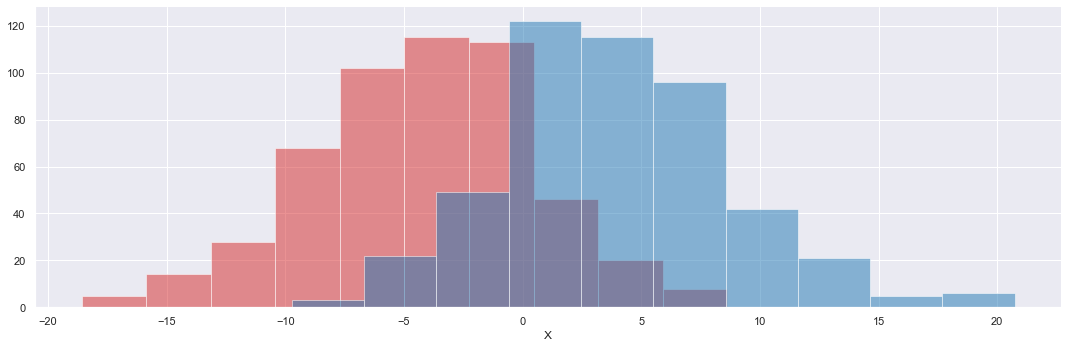

In [9]:
# Realizamos un histograma para cada clase
sns.FacetGrid( data=datos_1, hue="Z", height=5, aspect=3, palette=["#D62728","#1F77B4"] ).map(plt.hist,"X", alpha=0.5)
sns.FacetGrid( data=datos_2, hue="Z", height=5, aspect=3, palette=["#D62728","#1F77B4"] ).map(plt.hist,"X", alpha=0.5)
plt.show()

In [13]:
# Creamos el primer modelo
matriz_diseño_1 = datos_1.values[:,0:2]
y_real_1        = datos_1.values[:,  2]
modelo_lda_1    = LDA(n_components=None).fit( matriz_diseño_1, y_real_1 )

# Creamos el segundo modelo
matriz_diseño_2 = datos_2.values[:,0:2]
y_real_2        = datos_2.values[:,  2]
modelo_lda_2    = LDA(n_components=None).fit( matriz_diseño_2, y_real_2 )

# Estimamos nuestras nuevas clases/categorias
y_estimada_1 = modelo_lda_1.predict( matriz_diseño_1 )
y_estimada_2 = modelo_lda_2.predict( matriz_diseño_2 )

# Mostramos las matrices de confusión de ambos modelos
print("PRIMER MODELO--------------------------------------------------------------")
print("Precisión: ", accuracy_score( y_true = y_real_1, y_pred = y_estimada_1 ) )
print("Centroides:")
print( modelo_lda_1.means_ )
print("Matriz de Confusión:")
print( confusion_matrix( y_real_1, y_estimada_1 ) )
print("")
print("SEGUNDO MODELO-------------------------------------------------------------")
print("Precisión: ", accuracy_score( y_true = y_real_2, y_pred = y_estimada_2 ) )
print("Centroides:")
print( modelo_lda_2.means_ )
print("Matriz de Confusión:")
print( confusion_matrix( y_real_2, y_estimada_2 ) )


PRIMER MODELO--------------------------------------------------------------
Precisión:  0.991
Centroides:
[[-4.9987228  -2.97083081]
 [ 4.97726307  2.92509864]]
Matriz de Confusión:
[[527   2]
 [  7 464]]

SEGUNDO MODELO-------------------------------------------------------------
Precisión:  0.999
Centroides:
[[ 3.930245    5.43042808]
 [-4.22058054 -5.40632745]]
Matriz de Confusión:
[[480   1]
 [  0 519]]


## Datos :: Iris

In [14]:
# Leemos nuestros archivos 
datos = pd.read_csv("iris.csv")    # Datos con 3 clases
#datos = pd.read_csv("rock.csv")   # Datos con 12 clases
datos.sample(10)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
104,6.5,3.0,5.8,2.2,virginica
49,5.0,3.3,1.4,0.2,setosa
7,5.0,3.4,1.5,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa
24,4.8,3.4,1.9,0.2,setosa
125,7.2,3.2,6.0,1.8,virginica
70,5.9,3.2,4.8,1.8,versicolor
6,4.6,3.4,1.4,0.3,setosa
37,4.9,3.6,1.4,0.1,setosa
60,5.0,2.0,3.5,1.0,versicolor


['setosa' 'versicolor' 'virginica']


[]

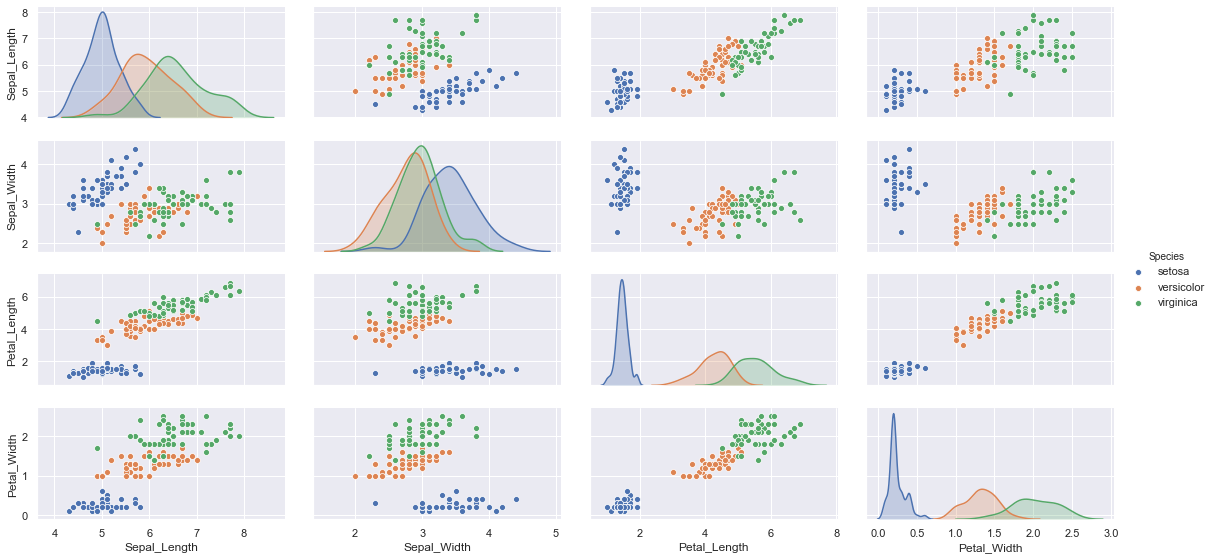

In [15]:
# Posibles clases/categorias a estimar
print( datos["Species"].unique() )

# Graficamos nuestros datos
sns.pairplot(datos, hue = "Species", height=2, aspect=2)
plt.plot()

In [16]:
# Generamos nuestra matriz de diseño y nuestro vector de Y a estimar
matriz_diseño = datos.iloc[:,0:4]
y_real        = datos.iloc[:,  4]
matriz_diseño.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
# Generamos el modelo de discrimante lineal
modelo_lda = LDA().fit( X = matriz_diseño, y = y_real )
modelo_lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [18]:
# Estimamos nuestras clases/categorias
y_estimada = modelo_lda.predict( matriz_diseño )
y_estimada[0:10]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [19]:
# Estimamos la probabilidad de pertenecer a alguna de las clases
# Por defecto, la función anterior nos devuelve la clase que tiene mayor probabilidad de pertenencia
modelo_lda.predict_proba( matriz_diseño.head() )

array([[1.00000000e+00, 3.89635793e-22, 2.61116827e-42],
       [1.00000000e+00, 7.21796992e-18, 5.04214335e-37],
       [1.00000000e+00, 1.46384895e-19, 4.67593159e-39],
       [1.00000000e+00, 1.26853638e-16, 3.56661049e-35],
       [1.00000000e+00, 1.63738745e-22, 1.08260527e-42]])

In [20]:
# Precisión y Matriz de Diseño del modelo
print( "Precisión: ", accuracy_score( y_true = y_real, y_pred = y_estimada ) )
print("Centroides:")
print( modelo_lda.means_ )
print("Matriz de Confusión:")
print( confusion_matrix( y_real, y_estimada ) )

Precisión:  0.98
Centroides:
[[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
Matriz de Confusión:
[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


# Datos :: Rocks

In [21]:
# Leemos nuestros archivos 
rocas = pd.read_csv("rock.csv")   # Datos con 12 clases
rocas.sample(10)

,area,peri,shape,perm,type_desc
26,7416,1916.24,0.191802,740.0,rock_7
12,10651,4036.54,0.228595,82.4,rock_4
5,7979,4010.15,0.167045,17.1,rock_2
16,10962,4608.66,0.204314,58.6,rock_5
3,7352,3869.32,0.117063,6.3,rock_1
39,5267,1644.96,0.253832,100.0,rock_10
8,8393,3682.04,0.203654,119.0,rock_3
36,3469,1376.70,0.176969,100.0,rock_10
13,8868,3518.04,0.231623,82.4,rock_4
10,9364,4480.05,0.150944,119.0,rock_3


['rock_1' 'rock_2' 'rock_3' 'rock_4' 'rock_5' 'rock_6' 'rock_7' 'rock_8'
 'rock_9' 'rock_10' 'rock_11' 'rock_12']


[]

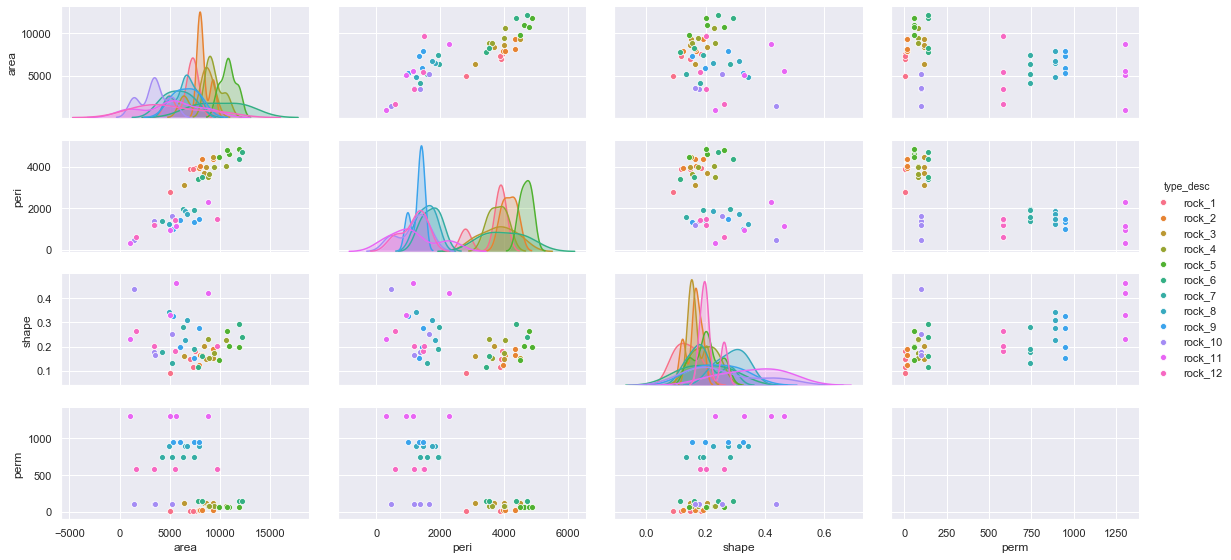

In [22]:
# Posibles clases/categorias a estimar
print( rocas["type_desc"].unique() )

# Graficamos nuestros datos
sns.pairplot(rocas, hue = "type_desc", height=2, aspect=2)
plt.plot()

In [27]:
# Generamos nuestra matriz de diseño y nuestro vector de Y a estimar
matriz_diseño = datos.iloc[:,0:4]
y_real        = datos.iloc[:,  4]

# Generamos el modelo de discrimante lineal
modelo_lda = QDA().fit( X = matriz_diseño, y = y_real )
modelo_lda

# Estimamos nuestras clases/categorias
y_estimada = modelo_lda.predict( matriz_diseño )
y_estimada[0:10]

# Precisión y Matriz de Diseño del modelo
print( "Precisión: ", accuracy_score( y_true = y_real, y_pred = y_estimada ) )

Precisión:  0.98
